In [1]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt


In [2]:
from scipy.optimize import curve_fit


def gauss_bg(x, A1, x01, sigma1):
    g1 = A1 * np.exp(-(x - x01)**2 / (2 * sigma1**2))
    return g1 


In [3]:
ge_calibration = []
nai_calibration = []

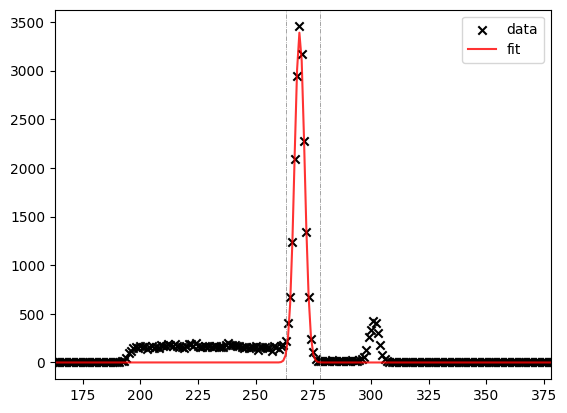

[3.39195015e+03 2.69072531e+02 2.19023577e+00]


In [4]:
data  = np.load("data/Co57_Ge/Histograms_PulseHeights/height.npy")
p0 = [3400,268 , 20]
theoretical = 122
lim1 =263
lim2 =278
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


ge_calibration.append([popt[1], theoretical])


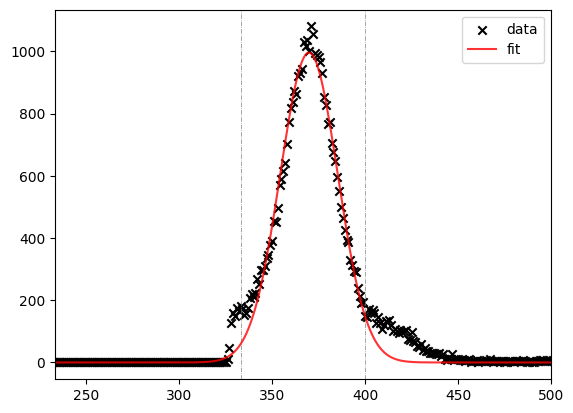

[996.33491879 369.79447125  15.48155426]


In [5]:
data  = np.load("data/Co57_NaI/Histograms_PulseHeights/height.npy")
p0 = [3400,268 , 20]
theoretical = 122
lim1 =333
lim2 =400
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


nai_calibration.append([popt[1], theoretical])


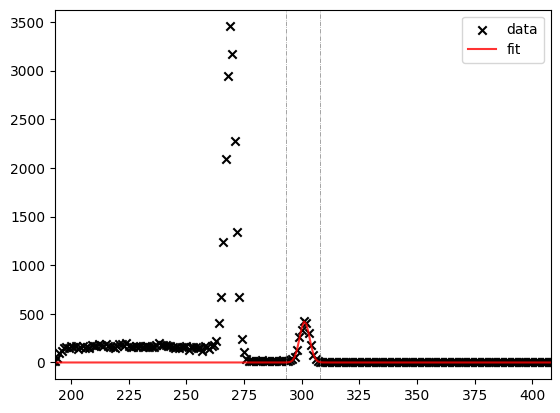

[422.77872198 301.2509711    2.1347088 ]


In [6]:
data  = np.load("data/Co57_Ge/Histograms_PulseHeights/height.npy")
p0 = [3400,299 , 20]
theoretical = 136
lim1 =293
lim2 =308
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


ge_calibration.append([popt[1], theoretical])


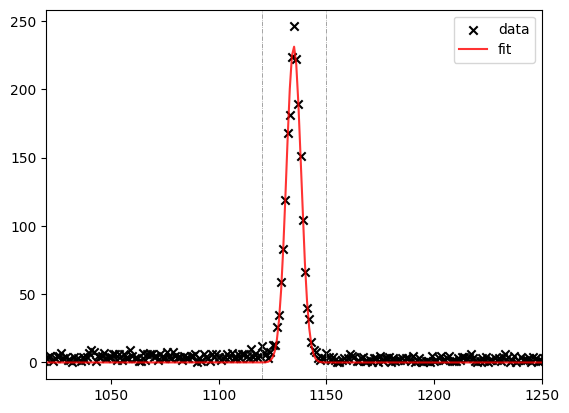

[ 231.49078798 1134.83340175   -3.40452613]


In [7]:
data  = np.load("data/Na22_Ge/Histograms_PulseHeights/height.npy")
p0 = [240,1130 , 20]
theoretical = 511
lim1 =1120
lim2 =1150
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


ge_calibration.append([popt[1], theoretical])


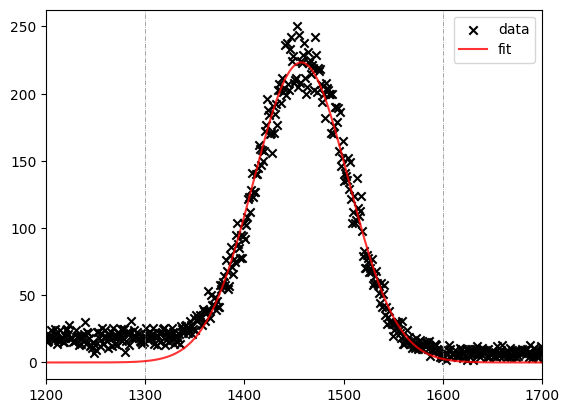

[ 223.25294069 1457.13443121   47.8528317 ]


In [8]:
data  = np.load("data/Na22_NaI/Histograms_PulseHeights/height.npy")
p0 = [240,1430 , 20]
theoretical = 511
lim1 =1300
lim2 =1600
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


nai_calibration.append([popt[1], theoretical])


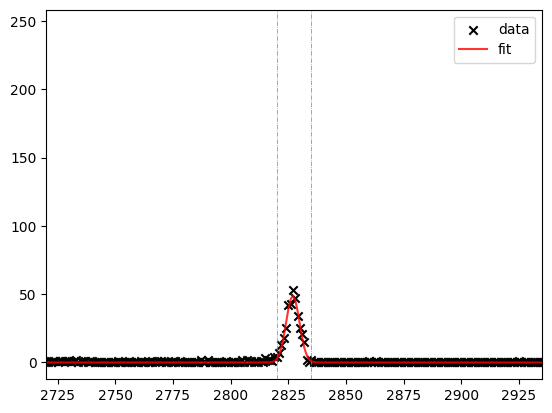

[  48.84619955 2826.94467097    2.86959632]


In [9]:
data  = np.load("data/Na22_Ge/Histograms_PulseHeights/height.npy")
p0 = [40, 2830, 2]
theoretical = 1275
lim1 =2820
lim2 =2835
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)#, sigma = np.sqrt(data[lim1:lim2]), absolute_sigma=True)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


ge_calibration.append([popt[1], theoretical])


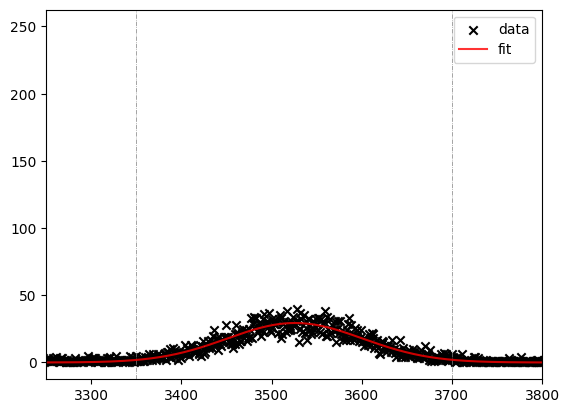

[  29.37426856 3525.93531064   75.08181154]


In [10]:
data  = np.load("data/Na22_NaI/Histograms_PulseHeights/height.npy")
p0 = [240,3430 , 20]
theoretical = 1275
lim1 =3350
lim2 =3700
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


nai_calibration.append([popt[1], theoretical])


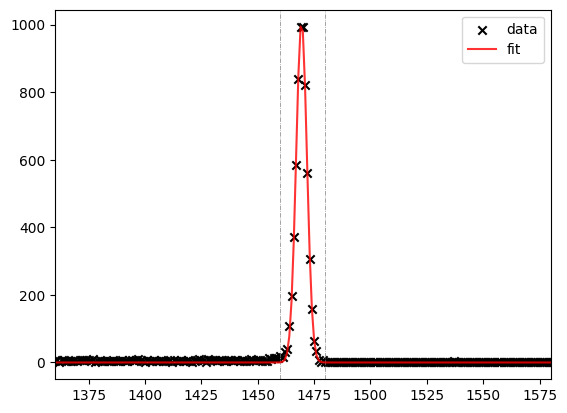

[1009.25165457 1469.41537185   -2.39293338]


In [11]:
data  = np.load("data/Cs_Ge/Histograms_PulseHeights/height.npy")
p0 = [3400, 1470, 20]
theoretical = 662
lim1 =1460
lim2 =1480
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


ge_calibration.append([popt[1], theoretical])


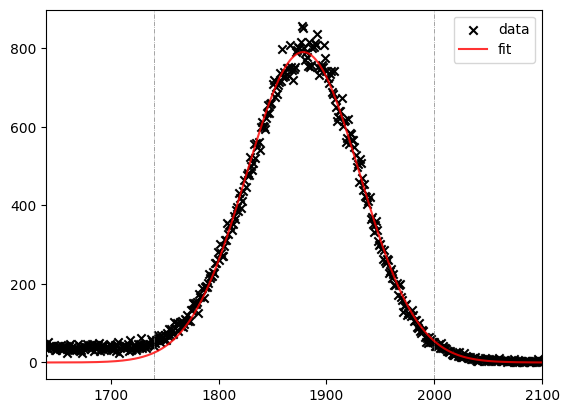

[ 789.87913664 1878.4113918    52.5701725 ]


In [12]:
data  = np.load("data/Cs_NaI/Histograms_PulseHeights/height.npy")
p0 = [3400, 1870, 20]
theoretical = 662
lim1 =1740
lim2 =2000
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


nai_calibration.append([popt[1], theoretical])


In [13]:
print(ge_calibration)
print(nai_calibration)


[[np.float64(269.07253107580584), 122], [np.float64(301.2509711009436), 136], [np.float64(1134.8334017501998), 511], [np.float64(2826.9446709691065), 1275], [np.float64(1469.4153718477805), 662]]
[[np.float64(369.79447125392664), 122], [np.float64(1457.1344312086474), 511], [np.float64(3525.935310635816), 1275], [np.float64(1878.4113918023656), 662]]


In [14]:
def line(x, a, b):
    return a*x + b

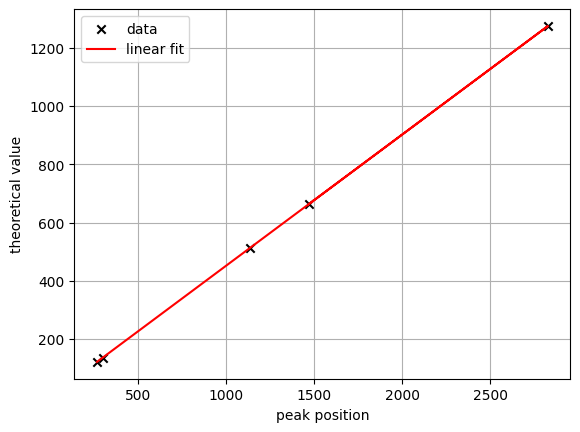

y-axis offset:  0.077370974151586


In [15]:
x = np.array([row[0] for row in ge_calibration])  # erste Spalte (float)
y = np.array([row[1] for row in ge_calibration])  # zweite Spalte (int)

popt, pcov = curve_fit(line, x, y)

plt.scatter(x, y, marker = 'x', color = 'black', label='data')
plt.plot(x, line(x, *popt), color = 'red', label = 'linear fit')
plt.xlabel('peak position')
plt.ylabel('theoretical value')
plt.legend()
plt.grid(True)
plt.savefig('linefit_ge.jpg', dpi = 800)
plt.show()
print('y-axis offset: ', popt[1])

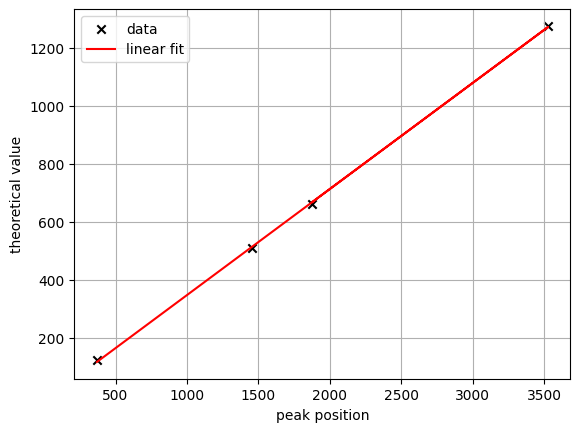

y-axis offset:  -18.66890127319358


In [16]:
x = np.array([row[0] for row in nai_calibration])  # erste Spalte (float)
y = np.array([row[1] for row in nai_calibration])  # zweite Spalte (int)

popt, pcov = curve_fit(line, x, y)

plt.scatter(x, y, marker = 'x', color = 'black', label='data')
plt.plot(x, line(x, *popt), color = 'red', label = 'linear fit')
plt.xlabel('peak position')
plt.ylabel('theoretical value')
plt.legend()
plt.grid(True)
plt.savefig('linefit_nai.jpg', dpi = 800)
plt.show()
print('y-axis offset: ', popt[1])

****Time Calibration****

In [26]:
#data  = np.load("data/Na22_coincidence/coincidences.csv")
#data  = np.loadtxt("data/Na22_coincidence/coincidences.csv", skiprows = 1)
import pandas as pd

df = pd.read_csv(
    'data/Na22_coincidence/coincidences.csv',
    skiprows=1,  # Skip header row
    header=None,
    names=['counter', 'timestamp', 'deadtime', 'height1', 'height2', 'timedifference']
)

# Data types: all float64 after load [code:1][code:2]
# Shape: (16840, 6) rows x columns [code:2]
# Summary stats:
print(df.describe())


            counter     timestamp      deadtime       height1       height2  \
count  16840.000000  1.684000e+04  16840.000000  16840.000000  16840.000000   
mean   28315.286401  1.770641e+09      0.074770    696.371675   1178.358967   
std    16459.017207  6.531385e+01      0.125234    429.217321    586.845445   
min        1.000000  1.770641e+09      0.001080    191.000000    131.000000   
25%    13987.250000  1.770641e+09      0.016698    395.000000    705.000000   
50%    28146.000000  1.770641e+09      0.028929    604.000000   1409.000000   
75%    42510.500000  1.770641e+09      0.069604    864.000000   1473.000000   
max    57055.000000  1.770641e+09      0.851759   3951.000000   4322.000000   

       timedifference  
count    16840.000000  
mean       -85.339786  
std         67.757626  
min       -536.000000  
25%        -87.000000  
50%        -86.000000  
75%        -85.000000  
max        430.000000  
